# <font color=#000080>Exploratory Data Analysis on Algerian Forest Fire dataset</font>

Linkedin: https://www.linkedin.com/in/satya-nerurkar-9b0655190/ <br>
Github: https://github.com/SatyaNerurkar

## Dataset Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

There are 122 instances for each region.

- The period from June 2012 to September 2012.<br>
- The dataset includes 11 attribues and 1 output attribue (class)<br>
- The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

Dataset can be downloaded from below link:<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

## Import Data and Required Packages

In [1]:
# Importing Pandas, Numpy, Matplotlib, Seaborn, plotly and Warings Library.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import colorama
from colorama import Fore

# Display enitre dataset in output cell.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Download and Import the CSV Data as Pandas DataFrame

In [2]:
# Importing top 122 rows from CSV file that contain data for Bejaia Region.

Bejaia_df = pd.read_csv('C:\\Users\\vishw\\OneDrive\\Documents\\Satya\\DS\\ineuron\\EDA\\Dataset\\AlgerianForestFire\\Algerian_forest_fires_dataset_UPDATE.csv',
                 header=1,nrows=122)

# Creating Region column and assigning value Bejaia for first 122 rows.
Bejaia_df['Region'] = 'Bejaia'

In [3]:
# Importing rest of data from CSV file that contain data for Sidi-Bel Abbes Region.
SidiBel_Abbes_df = pd.read_csv('C:\\Users\\vishw\\OneDrive\\Documents\\Satya\\DS\\ineuron\\EDA\\Dataset\\AlgerianForestFire\\Algerian_forest_fires_dataset_UPDATE.csv',
header=125)

# Creating Region column and assigning value Sidi-Bel Abbes for remaining rows.
SidiBel_Abbes_df['Region'] = 'Sidi-Bel Abbes'

In [4]:
# performed concat operation along columns to get final dataframe.

df = pd.concat([Bejaia_df, SidiBel_Abbes_df], axis=0, ignore_index=True)

In [5]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [6]:
# Validating first 3 rows from dataframe.

df.head(3)

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4  7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1  7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5  7.1  0.3  2.7   

   FWI    Classes    Region       date  
0  0.5  not fire     Bejaia 2012-06-01  
1  0.4  not fire     Bejaia 2012-06-02  
2  0.1  not fire     Bejaia 2012-06-03

In [7]:
# Validating last 3 rows from dataframe.

df.tail(3)

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
241   28      9  2012           27   87   29    0.5  45.9  3.5   7.9  0.4   
242   29      9  2012           24   54   18    0.1  79.7  4.3  15.2  1.7   
243   30      9  2012           24   64   15    0.2  67.3  3.8  16.5  1.2   

     BUI  FWI     Classes            Region       date  
241  3.4  0.2   not fire     Sidi-Bel Abbes 2012-09-28  
242  5.1  0.7   not fire     Sidi-Bel Abbes 2012-09-29  
243  4.8  0.5  not fire      Sidi-Bel Abbes 2012-09-30

In [8]:
# Shape of the dataset

print(Fore.BLUE+"This dataset contains {} rows and {} columns.".format(df.shape[0],df.shape[1]))

This dataset contains 244 rows and 16 columns.


In [9]:
# Check Null and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    int64         
 1   month        244 non-null    int64         
 2   year         244 non-null    int64         
 3   Temperature  244 non-null    int64         
 4    RH          244 non-null    int64         
 5    Ws          244 non-null    int64         
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    object        
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          244 non-null    object        
 13  Classes      243 non-null    object        
 14  Region       244 non-null    object        
 15  date         244 non-null    datetime64[ns]
dtypes: datet

**Attribute Information:**

    01. Date : (DD/MM/YYYY)Day, month('june' to 'september'), year(2012) Weather data observations
    02. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    03. RH : Relative Humidity in %: 21 to 90
    04. Ws : Wind speed in km/h: 6 to 29
    05. Rain: total day in mm: 0 to 16.8 FWI Components
    06. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    07. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    08. Drought Code (DC) index from the FWI system: 7 to 220.4
    09. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
    11. Fire Weather Index (FWI) Index: 0 to 31.1
    12. Classes: two classes, namely Fire and not Fire

**Additional Information about given features.**

- Fine Fuel Moisture Code:
    The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

- Duff Moisture Code:
    The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

- Drought Code:
    The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

- Initial Spread Index:
    The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

- Buildup Index:
    The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. The BUI is generally less than twice the DMC value, and moisture in the DMC layer is expected to help prevent burning in material deeper down in the available fuel.

- Fire Weather Index:
    The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.

## Data cleaning 

In [10]:
# Renaming column names so as to remove white spaces

df['Classes  '] = df['Classes  '].str.strip()

df.rename(columns = {'Classes  ':'Classes', ' RH':'RH',' Ws':'Ws', 'Rain ':'Rain'}, inplace = True)

In [11]:
# Removing row that contains null data.

df = df.dropna()

In [12]:
# No null values present in the dataset.

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

## Exploring Data 

### Profile of the dataset 

In [13]:
# Display summary statistics for a numerical features from dataframe.

df.describe().T

count         mean        std     min      25%     50%      75%  \
day          243.0    15.761317   8.842552     1.0     8.00    16.0    23.00   
month        243.0     7.502058   1.114793     6.0     7.00     8.0     8.00   
year         243.0  2012.000000   0.000000  2012.0  2012.00  2012.0  2012.00   
Temperature  243.0    32.152263   3.628039    22.0    30.00    32.0    35.00   
RH           243.0    62.041152  14.828160    21.0    52.50    63.0    73.50   
Ws           243.0    15.493827   2.811385     6.0    14.00    15.0    17.00   
Rain         243.0     0.762963   2.003207     0.0     0.00     0.0     0.50   
FFMC         243.0    77.842387  14.349641    28.6    71.85    83.3    88.30   
DMC          243.0    14.680658  12.393040     0.7     5.80    11.3    20.80   
ISI          243.0     4.742387   4.154234     0.0     1.40     3.5     7.25   
BUI          243.0    16.690535  14.228421     1.1     6.00    12.4    22.65   

                max  
day            31.0  
month           9.0  
year         2012.0  
Temperature    42.0  
RH             90.0  
Ws             29.0  
Rain           16.8  
FFMC           96.0  
DMC            65.9  
ISI            19.0  
BUI            68.0

In [14]:
# Display summary for a categorical features from dataframe.

df.describe(include = 'object').T

count unique     top freq
DC         243    212     8.2    4
FWI      243.0  160.0     0.5  7.0
Classes    243      2    fire  137
Region     243      2  Bejaia  122

In [15]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [16]:
# The Drought Code (DC) and Fire Weather Index (FWI) are numeric columns 
# hence converting them into float datatype
df['DC'] = df['DC'].astype('float64')
df['FWI'] = df['FWI'].astype('float64')

### Numeric and Categorical columns 

In [17]:
# define numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print numerical columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 14 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date']


In [18]:
# define categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print categorical columns
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 categorical features : ['Classes', 'Region']


In [19]:
# Highest temperature in the dataset.
highest_temp = df.sort_values(by='Temperature', ascending=False)[['month', 'day', 'Rain', 'Temperature']].head()

# Lowest temperature in the dataset.
lowest_temp =  df.sort_values(by='Temperature', ascending=True)[['month', 'day', 'Rain', 'Temperature']].head()

print("Highest Temperature")

print(highest_temp)
print('*'*35)
print("Lowest Temperature")
print(lowest_temp)

Highest Temperature
     month  day  Rain  Temperature
199      8   17   0.0           42
193      8   11   0.0           40
184      8    2   0.0           40
198      8   16   0.1           40
176      7   25   1.2           39
***********************************
Lowest Temperature
     month  day  Rain  Temperature
105      9   14   8.3           22
93       9    2  10.1           22
243      9   30   0.2           24
242      9   29   0.1           24
106      9   15   0.4           24


In [20]:
# Highest Rainfall in the dataset.
highest_rain = df.sort_values(by='Rain', ascending=False)[['month', 'day', 'Rain', 'Temperature']].head()

# Highest Rainfall in the dataset.
lowest_rain =  df.sort_values(by='Rain', ascending=True)[['month', 'day', 'Rain', 'Temperature']].head()

print("Highest Rainfall")

print(highest_rain)
print('*'*35)
print("Lowest Rainfall")
print(lowest_rain)

Highest Rainfall
     month  day  Rain  Temperature
91       8   31  16.8           28
2        6    3  13.1           26
93       9    2  10.1           22
139      6   18   8.7           33
105      9   14   8.3           22
***********************************
Lowest Rainfall
     month  day  Rain  Temperature
0        6    1   0.0           29
203      8   21   0.0           36
202      8   20   0.0           36
96       9    5   0.0           29
200      8   18   0.0           37


In [21]:
# Highest Fine Fuel Moisture Code values in dataset
highest_FFMC = df.sort_values(by='FFMC', ascending=False)[['month', 'day', 'Rain', 'Temperature', 'FFMC']].head()

# Lowest Fine Fuel Moisture Code values in dataset
lowest_FFMC =  df.sort_values(by='FFMC', ascending=True)[['month', 'day', 'Rain', 'Temperature', 'FFMC']].head()

print("Highest Fine Fuel Moisture Code")

print(highest_FFMC)
print('*'*35)
print("Lowest Fine Fuel Moisture Code")
print(lowest_FFMC)

Highest Fine Fuel Moisture Code
     month  day  Rain  Temperature  FFMC
199      8   17   0.0           42  96.0
200      8   18   0.0           37  94.3
193      8   11   0.0           40  94.2
229      9   16   0.0           33  93.9
172      7   21   0.0           36  93.9
***********************************
Lowest Fine Fuel Moisture Code
     month  day  Rain  Temperature  FFMC
3        6    4   2.5           25  28.6
93       9    2  10.1           22  30.5
15       6   16   0.7           29  36.1
16       6   17   0.6           30  37.3
214      9    1   0.0           29  37.9


In [22]:
# Highest Buildup Index (BUI) values in dataset
highest_BUI = df.sort_values(by='BUI', ascending=False)[['month', 'day', 'Rain', 'Temperature', 'BUI']].head()

# Lowest Buildup Index (BUI) values in dataset
lowest_BUI =  df.sort_values(by='BUI', ascending=True)[['month', 'day', 'Rain', 'Temperature', 'BUI']].head()

print("Highest Buildup Index")

print(highest_BUI)
print('*'*35)
print("Lowest Buildup Index")
print(lowest_BUI)

Highest Buildup Index
     month  day  Rain  Temperature   BUI
209      8   27   0.0           36  68.0
89       8   29   0.0           35  67.4
208      8   26   0.0           33  64.0
88       8   28   0.0           34  62.9
207      8   25   0.0           34  59.5
***********************************
Lowest Buildup Index
     month  day  Rain  Temperature  BUI
93       9    2  10.1           22  1.1
214      9    1   0.0           29  1.4
106      9   15   0.4           24  1.4
16       6   17   0.6           30  1.6
105      9   14   8.3           22  1.6


In [23]:
# Highest Fire Weather Index (FWI) values in dataset
highest_FWI = df.sort_values(by='FWI', ascending=False)[['month', 'day', 'Temperature', 'FWI']].head()

# Lowest Fire Weather Index (FWI) values in dataset
lowest_FWI =  df.sort_values(by='FWI', ascending=True)[['month', 'day', 'Temperature', 'BUI']].head()

print("Highest Fire Weather Index")

print(highest_FWI)
print('*'*35)
print("Lowest Fire Weather Index")
print(lowest_FWI)

Highest Fire Weather Index
     month  day  Temperature   FWI
207      8   25           34  31.1
208      8   26           33  30.3
89       8   29           35  30.2
172      7   21           36  30.0
206      8   24           35  26.9
***********************************
Lowest Fire Weather Index
     month  day  Temperature  BUI
104      9   13           25  1.8
3        6    4           25  1.7
240      9   27           28  6.2
93       9    2           22  1.1
94       9    3           25  1.7


### Initial Analysis report 

- August month is the hottest month followed by july in the given data with highest recorded temperature is 42°C and September month is colder month with lowest recorded temperature is 22°C.
- September and June month received more rainfall than July and August month.
- Fine Fuel Moisture Code, Fire Weather Index, Buildup Index is high in August month when temperature in higher and low in September month when temperature is lower.

## Visualization

### Univariate Analysis 

In [24]:
# Displaying Skewness in the features.

df.skew()

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

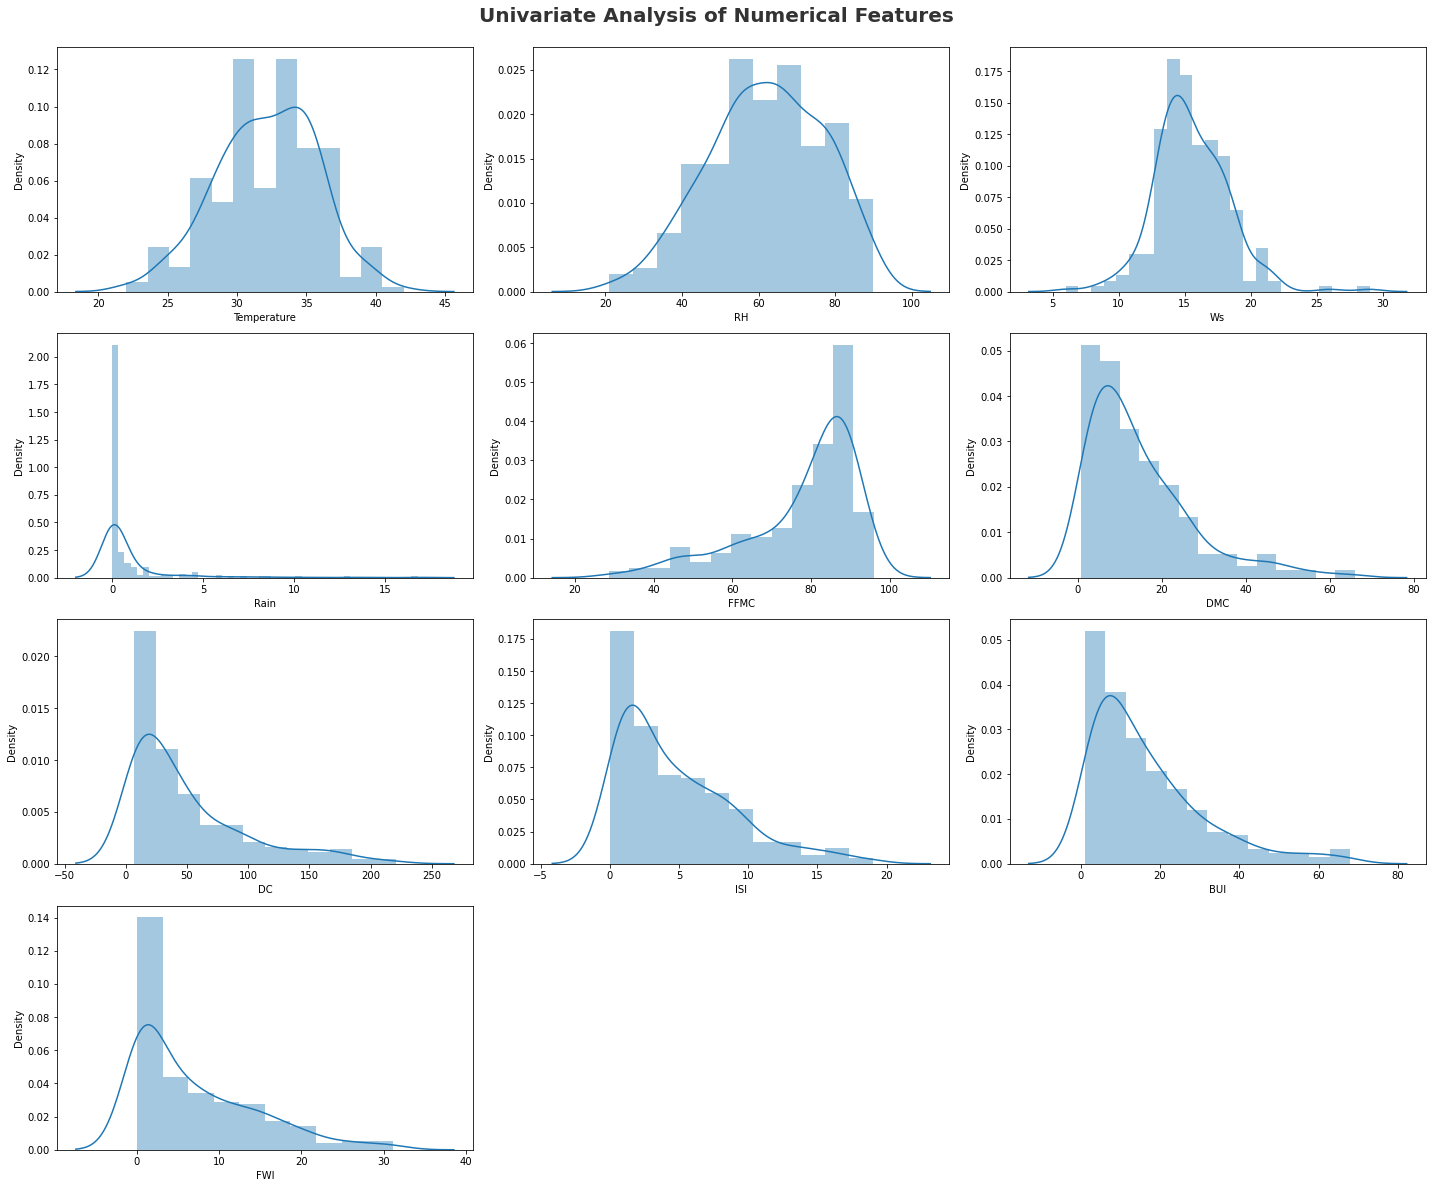

In [25]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_cols =['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 

for i in range(0, len(numeric_cols)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[numeric_cols[i]],kde=True)
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

In [26]:
for feature in numeric_cols:
    fig = go.Figure()

    fig.add_trace(go.Box(
    y=df[feature],
    name=feature,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(51, 103, 255)',
    line_color='rgb(51, 205, 255)'))

    fig.update_layout(title_text="Box Plot For Outliers in "+feature)
    fig.show()

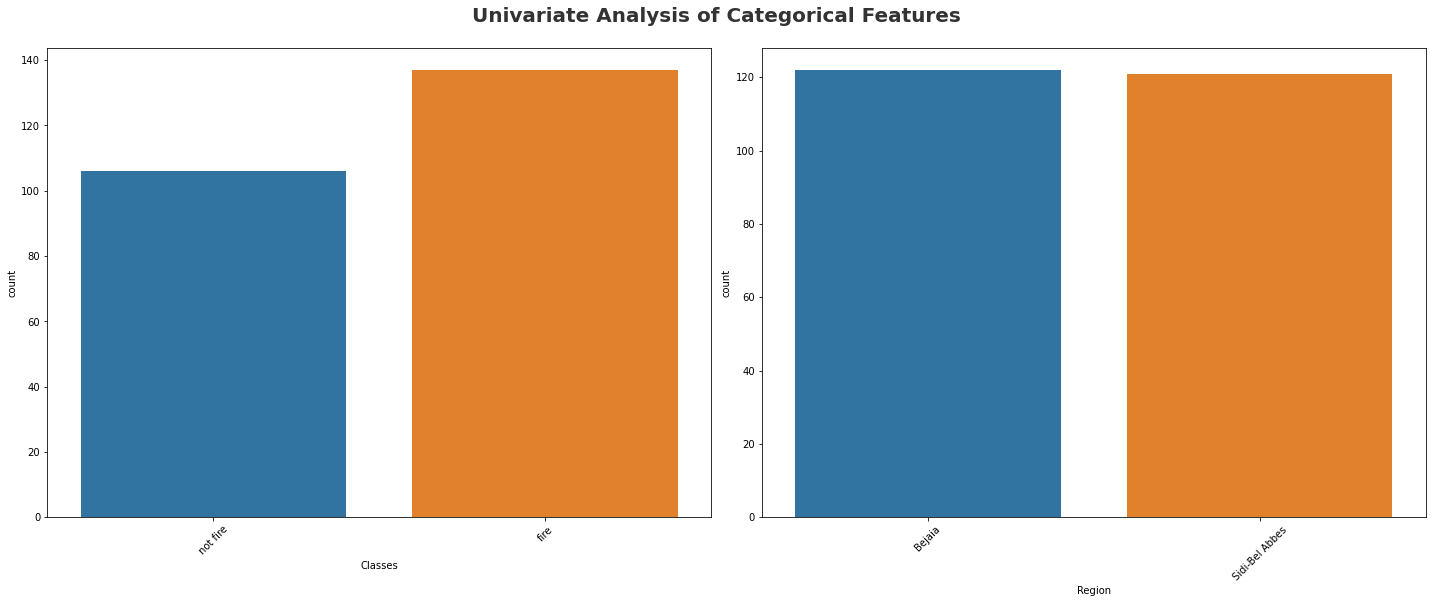

In [27]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [28]:
fig = px.histogram(df, x="Temperature", color="Region", marginal="violin",hover_data=df.columns,
                  title="Temperature distribution in °C", width=800, height=600)
fig.update_layout(bargap=0.02)
fig.show()

Observations:
- Rain, Duff Moisture Code (DMC), Drought Code (DC), Buildup Index (BUI) are are right skewed and postively skewed. 
- Rain, Duff Moisture Code (DMC), Drought Code (DC), Buildup Index (BUI) has outliers.
- Temperature, Relative Humidity (RH), Wind speed (Ws) follow normal distribution

### Bivariate analysis and multivariate analysis

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

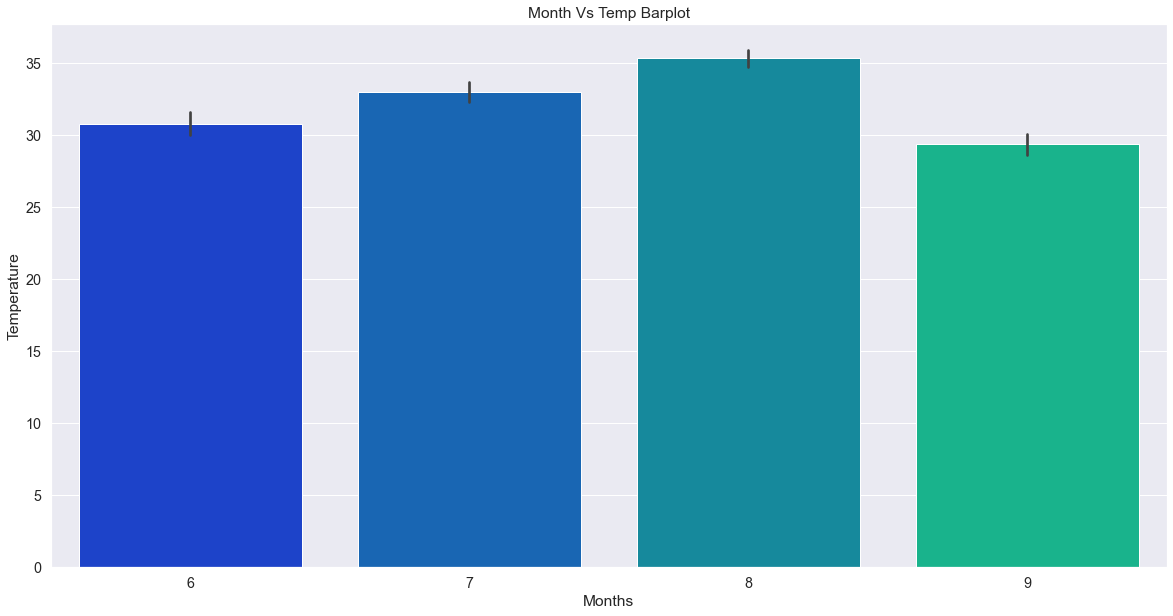

In [29]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'Temperature', data = df, palette = 'winter')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

[Text(0.5, 1.0, 'Month Vs Rainfall Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Rain')]

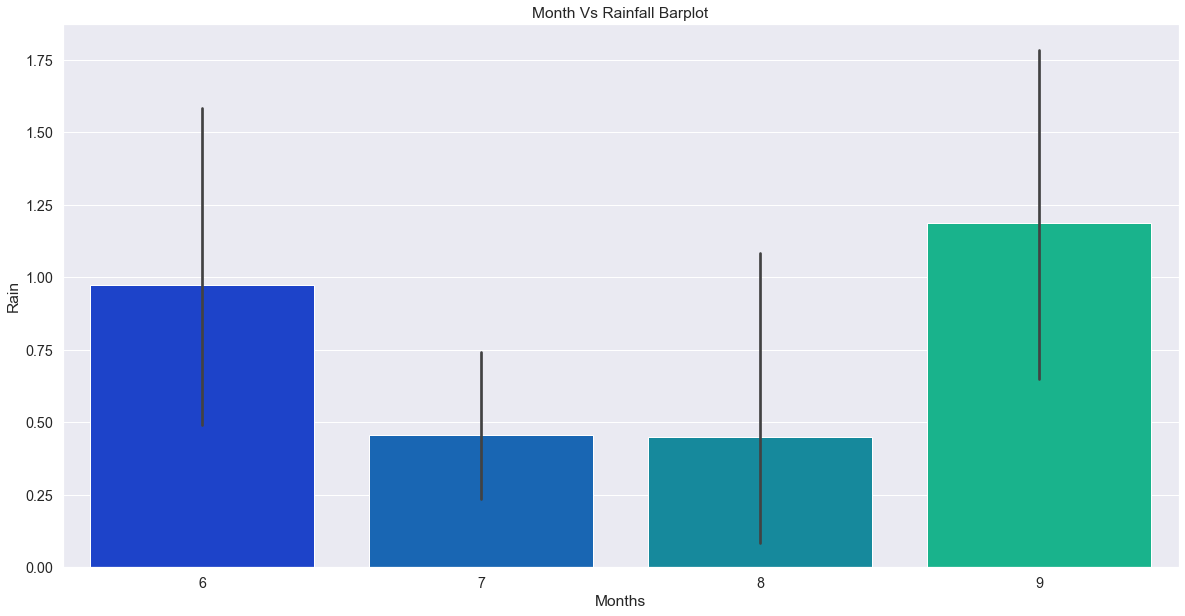

In [30]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'Rain', data = df, palette = 'winter')
month_temp.set(title = "Month Vs Rainfall Barplot", xlabel = "Months", ylabel = "Rain")

In [31]:
fig = px.scatter(df, x="FFMC", y="Temperature", color = 'Classes')
fig.show()

In [32]:
fig = px.scatter(df, x="Ws", y="FWI", color='Classes')
fig.show()

In [33]:
fig = px.scatter(df, x="FFMC", y="ISI", color='Classes')
fig.show()

In [34]:
fig = px.scatter(df, x='day', y="BUI", hover_data=['month'] ,color='Classes')
fig.show()

In [35]:
fig = px.scatter(df, x='Ws', y="Rain" ,color='Classes')
fig.show()

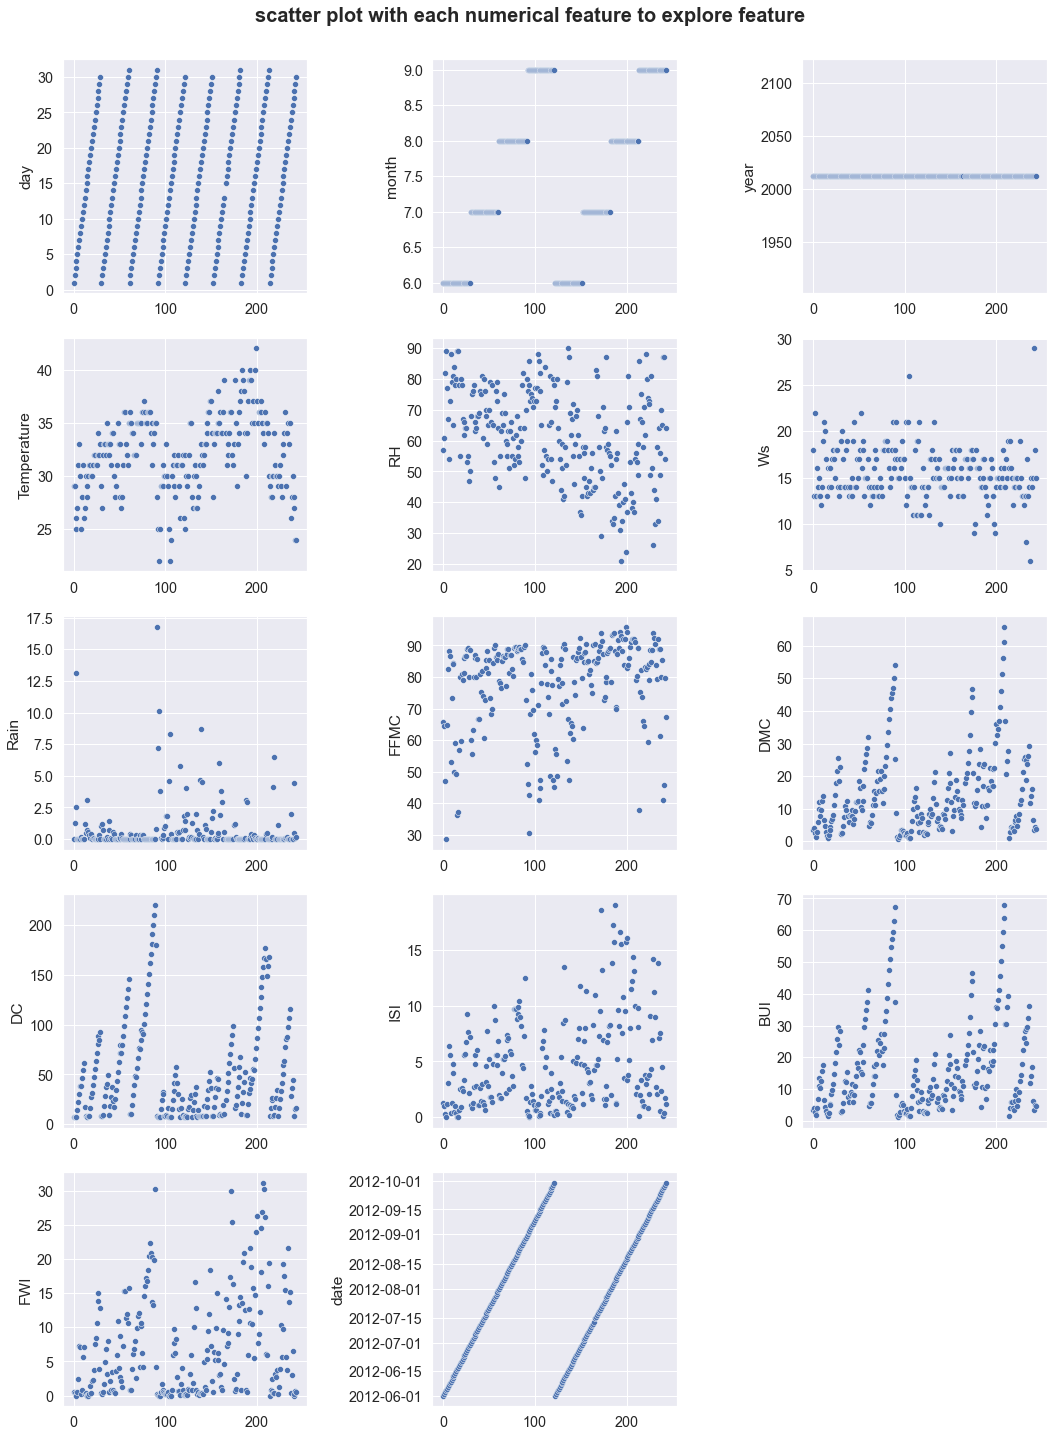

In [36]:
# scatter plot to see the trends in each numerical column

plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numeric_features[i], x=df.index, data=df)
    plt.tight_layout()

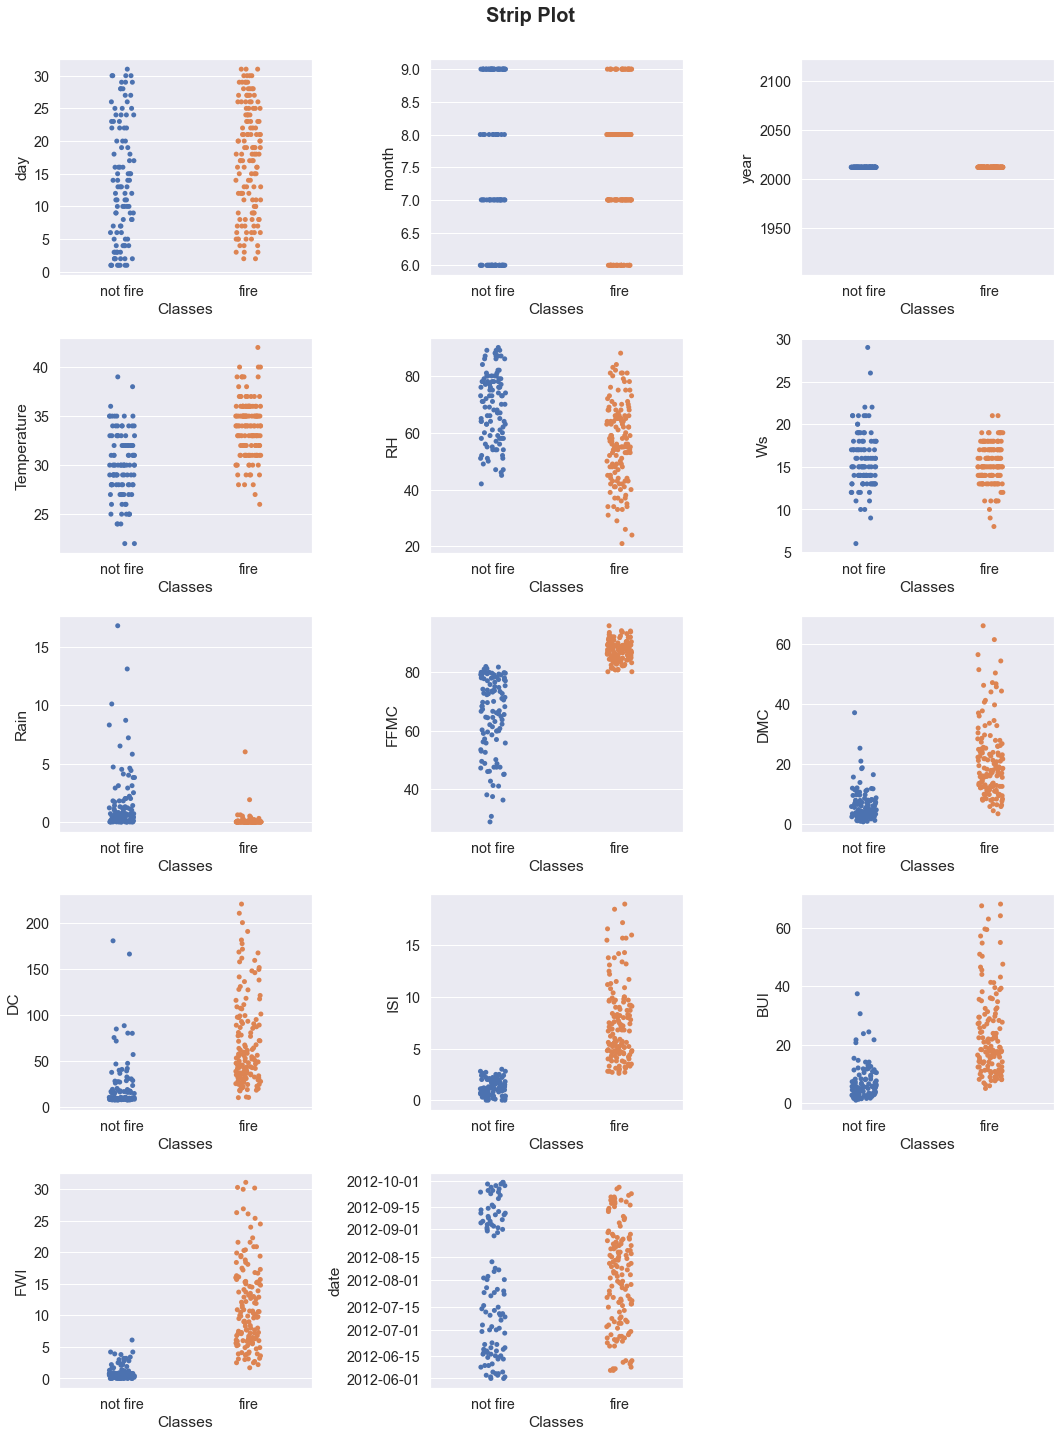

In [37]:
# strip plot to see the relationship between numerical features and target


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_features[i], x='Classes', data=df)
    plt.tight_layout()

Observation:
- Temperature is higher in  July and August month. This increases chances of forest fire in these months.
- Rainfall is higher in September month. From the chart above it is clear that temperature is relatively lower in this month. This decreases chances of forest fire in september month.
- Temperature greater than 25°C and Fine Fuel Moisture Code (FFMC) rating above 80 increases risk of forest fire.
- Wind speed between 10km/hr to 20km/hr and Fire Weather Index (FWI) index above 5 increases risk of forest fire.
- Fine Fuel Moisture Code (FFMC) rating greater than 80 and Initial Spread Index (ISI) index above 3 increases risk of forest fire.
- Buildup Index (BUI) is greater in August month which will increase risk of forest fire.

### Multicolleniarity in numerical features

In [38]:
df.corr()

day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI          0.350781  0.082639   NaN     0.566670 -0.580957  0.032368   

                 Rain      FFMC       DMC        DC       ISI       BUI  \
day         -0.112523  0.224956  0.491514  0.527952  0.180543  0.517117   
month        0.034822  0.017030  0.067943  0.126511  0.065608  0.085073   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.326492  0.676568  0.485687  0.376284  0.603871  0.459789   
RH           0.222356 -0.644873 -0.408519 -0.226941 -0.686667 -0.353841   
Ws           0.171506 -0.166548 -0.000721  0.079135  0.008532  0.031438   
Rain         1.000000 -0.543906 -0.288773 -0.298023 -0.347484 -0.299852   
FFMC        -0.543906  1.000000  0.603608  0.507397  0.740007  0.592011   
DMC         -0.288773  0.603608  1.000000  0.875925  0.680454  0.982248   
DC          -0.298023  0.507397  0.875925  1.000000  0.508643  0.941988   
ISI         -0.347484  0.740007  0.680454  0.508643  1.000000  0.644093   
BUI         -0.299852  0.592011  0.982248  0.941988  0.644093  1.000000   
FWI         -0.324422  0.691132  0.875864  0.739521  0.922895  0.857973   

                  FWI  
day          0.350781  
month        0.082639  
year              NaN  
Temperature  0.566670  
RH          -0.580957  
Ws           0.032368  
Rain        -0.324422  
FFMC         0.691132  
DMC          0.875864  
DC           0.739521  
ISI          0.922895  
BUI          0.857973  
FWI          1.000000

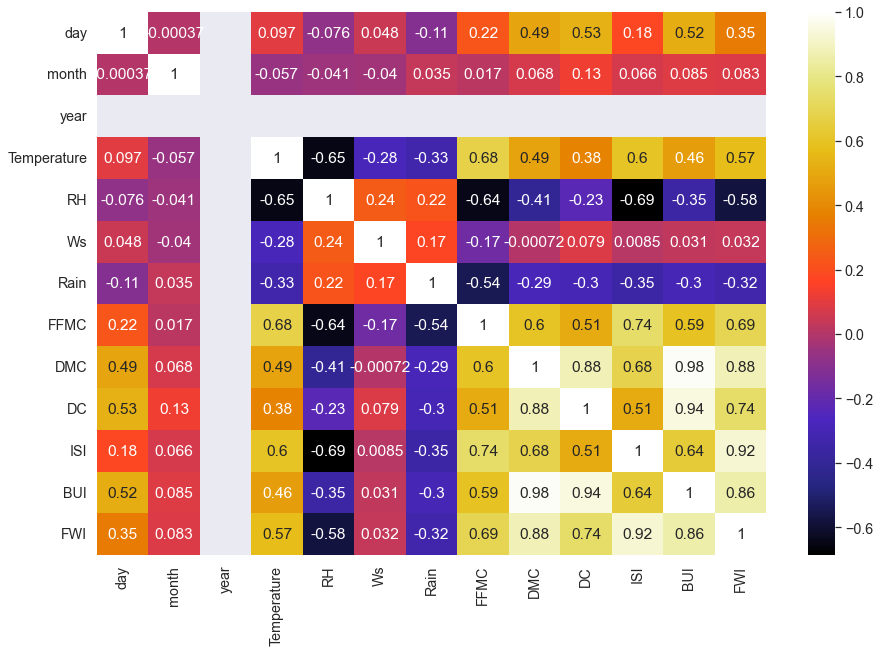

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

observation -

- Highly positive correlated features are DMC and BUI, DC and BUI, ISI and PWI
- Highly negative correlated features are RH and Temp, RH and FFMC, RH and ICI

### Final Report

There are three components needed for ignition and combustion to occur. A fire requires fuel to burn, air to supply oxygen, and a heat source to bring the fuel up to ignition temperature.
- Months like July and August with higher temperature has fire.
- Months like June and September with higher Rainfall helps lowering the temperature and provide more humidity in air thus decreasing risk of fire.
- High temperature along with wind speed provides more oxygen to the fire and may increase its intensity and spread. 
- Factors such as temperature greater than 25°C, Fine Fuel Moisture Code (FFMC) rating above 80, Wind speed between 10km/hr to 20km/hr and Fire Weather Index (FWI) index above 5 increases risk of forest fire.